# What is Auto Regression?
Within Time Series Analysis there are several algorithms that computers can use to predict future values. One of these algorithms is the auto regression algorithm. The auto regression model is characterized by using previous values to make predictions of future values. For example in the stock market auto regression is used to predict the rise in stocks based on the stocks historic values. 

# Stock Example
To explain further we could consider a stock with the value of $5 dollars per share. Using the auto regression model the values $1, $3 , and $4 are put into the model along with the current value of $5. For this example $1 is three months ago, $3 is two months ago, and $4 is one month ago with $5 being the present price. In order to calculate this the values would be placed in the algorithm below.

$ m_{t} = \beta_{0} + \beta_{1}m_{t-1} + \beta_{2}m_{t-2} + \beta_{3}m_{t-3} + \epsilon_{t} $

The result of this algorithm would be the predicted value of the stock.

# Auto Regression in Raven
For the purposes of Raven, auto regression works similarly to wavelet, and fourier transformation. The auto regression algorithm takes signals from the reactor as input. Then, based on this input, the algorithm characterizes the input and makes a prediction of expected signals in the future. This adds a furhter layer to protection to the reactor and further applicability to Raven.

# Code
Below is code related to the auto regession algorithm and a demonstration of its functionality. For demonstration purposes statsmodel is being used to predict the price of gamestop.

In [1]:
%%capture
#Install and Import the needed libraries and tools.
!pip install statsmodels
!pip install matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sm
import statsmodels.graphics.tsaplots as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the original dataset
df = pd.read_csv("raw_data/GME.csv")

In [3]:
#read the modified input for Raven.
df = pd.read_csv("raw_data/gameStopInput.csv")

In [4]:
#pass the input into the acf function, this is the same function that is used in Raven.
array = sm.acf(df.y[1:2600], nlags=26000)

In [5]:
#create a new dataset to graph x and y.
xAfter=[]
yAfter=[]
for i in range(len(array)):
    xAfter.append(i)
    yAfter.append(array[i])


In [6]:
#set the dataset to our x and y values.
x = np.array(xAfter)
y = np.array(yAfter)
dataset = pd.DataFrame({'x': x, 'y': y}, columns=['x', 'y'])

The graph below shows the autocorrelation factor that is produced from the gamestop data.

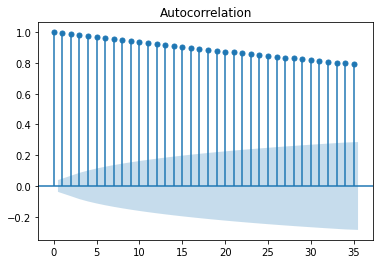

In [7]:
#graph our x and y values
sp.plot_acf(array)
plt.show()

The chart below shows the gamestop stock data next to the autocorrelation results. Gamestop data is shown in red and autocorrelation results are shown in blue.

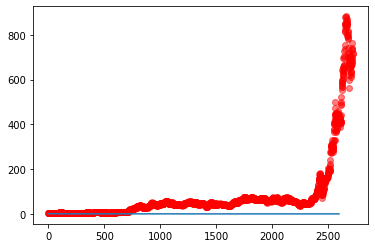

In [8]:
#Graph the autocorrelation next to the original data.
x = df.x
y = df.y

dat = pd.DataFrame({'x': x, 'y': y})
dat.to_csv('raw_data/gameStop.csv', index=False)


plt.plot(x, y, 'o', alpha=0.5, color='red')
plt.plot(dataset.x, dataset.y)
plt.show()

Below is a second example of Auto Regression. This time predictions for the Tesla stock price is being used.

# Auto Regression in Raven

This is a visual representation of what Raven is doing with the same dataset, Gamestop.

In [9]:
#Read the input for Raven
df = pd.read_csv("raw_data/gameStopInput.csv")

In [10]:
#Read the results from Raven.
dataset = pd.read_csv("raw_data/GameStopResults.csv")

As shown before here is the gamestop stock data next to the produced autocorrelation values.

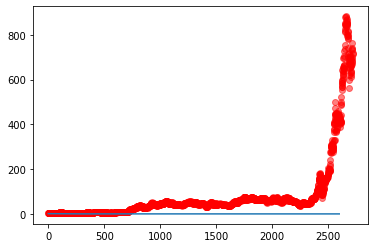

In [11]:
#graph the original value next to the autocorrelation output.
x = df.x
y = df.y


dat = pd.DataFrame({'x': x, 'y': y})
dat.to_csv('raw_data/gameStop.csv', index=False)


plt.plot(x, y, 'o', alpha=0.5, color='red')
plt.plot(dataset.x, dataset.y)
plt.show()

The above graph shows the autocorrelation compared to the price of gamestop. This is not a very good representation of autocorrelation however, a better description can be found in the graph below.

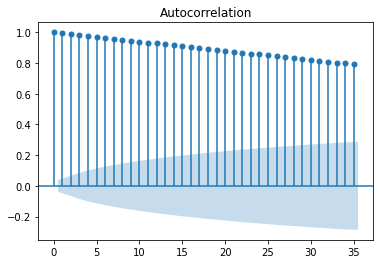

In [12]:
#Graph the autocorrelation values.
sp.plot_acf(dataset.y)
plt.show()

The graph above depicts autocorrelation in a more understandable way. If we adjust the parameters to more specific instances such as from 2500 to 2600 the autocorrelation values will also change for example the slope may be steeper or more gradual depending on the prices within the 2500 to 2600 range. 

In [13]:
#Pass the values into the acf the only difference is the range is smaller.
array = sm.acf(dataset.y[1:100], nlags=100)

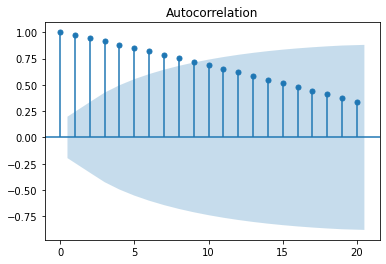

In [14]:
#With a shorter range we can see that the autocorrelation values become much steeper.
sp.plot_acf(array)
plt.show()

As we can see with a y range from 1 to 100 the slope of autocorrelation becomes much steeper.